In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from catboost import CatBoostClassifier
import sklearn.metrics as metrics
import random
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_excel('train_first.xlsx')

In [3]:
test_df = pd.read_excel('test.xlsx')

In [4]:
df.head()

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
0,12,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789,NK,0
1,33,2412.8305,NaN,0.157153,0.755472,0.453216,0.715147,NaN,0.523432,0.388729,0.519233,0.799167,0.563573,0.111216,ARGILLIT,0
2,33,2522.5575,NaN,0.172235,0.941742,0.525711,0.668600,NaN,0.588924,0.515214,0.527139,0.799167,0.551152,0.172359,ARGILLIT,0
3,49,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,0.575175,0.799167,0.429433,0.253563,ARGILLIT,0
4,49,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,0.575725,0.799167,0.447169,0.959633,ARGILLIT,0


In [5]:
test_df.head()

,id,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS
0,1,47,2465.5460,0.665198,0.259688,0.865866,0.526683,0.116218,0.464870,0.124486,0.196296,0.483192,0.643774,0.376472,0.261831
1,2,47,2465.6355,0.115153,0.258287,0.161988,0.583114,0.122256,0.477795,0.118895,0.146578,0.491132,0.655735,0.359872,0.236470
2,3,47,2465.7250,0.155254,0.318849,0.125817,0.639544,0.128194,0.497212,0.111693,0.968615,0.499726,0.667695,0.343272,0.266756
3,4,47,2465.8145,0.125315,0.474215,0.149127,0.638636,0.128239,0.478265,0.987464,0.546126,0.492469,0.659642,0.341159,0.332568
4,5,47,2465.9040,0.953756,0.638341,0.172437,0.637663,0.113455,0.465892,0.858188,0.123651,0.485865,0.651513,0.339456,0.398383


In [6]:
print(sorted(df['well id'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 

In [7]:
print(len(df['well id'].unique()))
deltas = []
for id in tqdm_notebook(df['well id'].unique()):
    deltas.append(max(df[df['well id'] == id]['depth, m']) - min(df[df['well id'] == id]['depth, m']))

282


In [8]:
sorted(deltas)

[19.33199999999988,
 21.390499999999975,
 21.74850000000015,
 40.8119999999999,
 43.4074999999998,
 43.67599999999993,
 47.166499999999814,
 47.4350000000004,
 47.79300000000012,
 48.240499999999884,
 48.59850000000006,
 49.04599999999982,
 51.91000000000031,
 52.447000000000116,
 52.447000000000116,
 53.43149999999969,
 54.326500000000124,
 54.50550000000021,
 54.50550000000021,
 54.77400000000034,
 55.847999999999956,
 55.9375,
 58.17500000000018,
 58.44349999999986,
 59.06999999999971,
 60.86000000000013,
 62.91850000000022,
 63.45550000000003,
 65.60350000000017,
 76.97000000000025,
 81.44500000000016,
 81.98199999999997,
 85.02500000000009,
 85.47249999999985,
 86.99400000000014,
 87.62049999999999,
 88.06800000000021,
 89.67900000000009,
 91.91650000000027,
 92.27449999999999,
 92.27449999999999,
 92.99049999999988,
 93.70649999999978,
 94.86999999999989,
 95.22800000000007,
 95.22800000000007,
 95.58599999999979,
 96.12299999999959,
 96.39149999999972,
 97.01800000000003,
 97.64

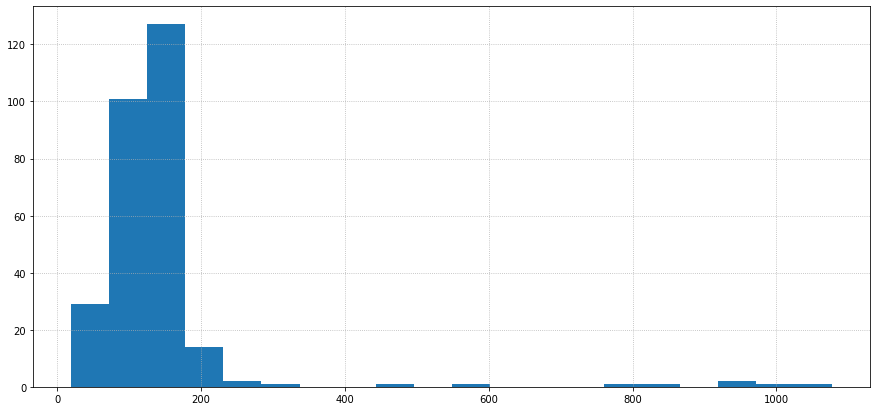

In [9]:
plt.figure(figsize=(15, 7))
plt.hist(deltas, bins=20)
plt.grid(ls=':')

In [10]:
for col in df.columns:
    print(col, df[col].isnull().values.any())

well id False
depth, m False
bk True
GZ1 True
GZ2 True
GZ3 True
GZ4 True
GZ5 True
GZ7 True
DGK True
NKTD True
NKTM True
NKTR True
ALPS True
lith False
goal False


In [11]:
deltas = []
for id in df['well id'].unique():
    depths = df[df['well id'] == id]['depth, m'].sort_values()
    for i in range(1, len(depths)):
        deltas.append(depths.iloc[i] - depths.iloc[i - 1])

In [12]:
np.mean(deltas)

0.08787395576070664

In [13]:
costs = {}
costs['bk'] = 2450
costs['GZ1'] = 2050
costs['GZ2'] = 2050
costs['GZ3'] = 2050
costs['GZ4'] = 2050
costs['GZ5'] = 2050
costs['GZ7'] = 2050
costs['DGK'] = 1300
costs['NKTD'] = 2050
costs['NKTM'] = 2050
costs['NKTR'] = 2050
costs['ALPS'] = 1150

In [14]:
np.unique(deltas)

array([ 0.    ,  0.0895,  0.0895,  0.0895,  0.0895,  0.2685,  0.358 ,
        0.358 ,  0.4475,  0.6265,  0.716 ,  0.8055,  0.895 ,  1.253 ,
        1.3425,  1.432 ,  2.327 ,  2.506 ,  2.5955,  3.759 ,  3.938 ,
        4.3855,  5.191 ,  5.6385,  6.981 ,  6.981 ,  8.3235,  8.6815,
        9.487 , 11.7245, 12.2615, 14.499 , 31.0565])

In [15]:
DELTA = 0.08950000000004366

In [16]:
df_no_null= df.copy()

In [17]:
cortages = ['bk', 'GZ1', 'GZ2', 'GZ3', 'GZ4', 'GZ5', 'GZ7', 'DGK', 'NKTD', 'NKTM', 'NKTR', 'ALPS']
df_no_null[cortages] = df_no_null[cortages].apply(lambda x: x.fillna(x.mean()), axis=0)
df_no_null

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
0,12,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789,NK,0
1,33,2412.8305,0.354064,0.157153,0.755472,0.453216,0.715147,0.301386,0.523432,0.388729,0.519233,0.799167,0.563573,0.111216,ARGILLIT,0
2,33,2522.5575,0.354064,0.172235,0.941742,0.525711,0.668600,0.301386,0.588924,0.515214,0.527139,0.799167,0.551152,0.172359,ARGILLIT,0
3,49,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,0.575175,0.799167,0.429433,0.253563,ARGILLIT,0
4,49,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,0.575725,0.799167,0.447169,0.959633,ARGILLIT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463892,287,2217.3625,0.354064,0.213477,0.121747,0.510815,0.487103,0.301386,0.554748,0.418060,0.442153,0.533739,0.447622,0.712853,ARGILLIT,0
463893,287,2217.4520,0.354064,0.215987,0.122570,0.510815,0.487103,0.301386,0.554748,0.418060,0.444390,0.533739,0.447622,0.676591,ARGILLIT,0
463894,287,2217.5415,0.354064,0.215987,0.119374,0.510815,0.487103,0.301386,0.554748,0.418060,0.445926,0.533739,0.447622,0.718157,ARGILLIT,0
463895,287,2217.6310,0.354064,0.215987,0.118723,0.510815,0.487103,0.301386,0.554748,0.418060,0.447813,0.533739,0.447622,0.759722,ARGILLIT,0


In [18]:
df_processed = df_no_null.copy()
ids = df_processed['well id'].unique()
random.shuffle(ids)
cut = int(len(ids) * 0.67)
X_train_ids = ids[:cut]
X_test_ids = ids[cut:]

In [19]:
X_train_ids

array([ 29,  10, 285, 173, 271, 148, 263,  50, 106, 230, 280, 140, 101,
        72, 229,   7, 112, 216,  67,  56, 209, 238,  19, 166, 268, 152,
        41, 178,  68,   5, 260, 222,  90,  59,  42, 168, 252, 213, 122,
       237, 210, 192, 236, 119, 139,  37, 211, 110, 183, 169, 153, 124,
       138,  93, 279,  85, 249, 276,  94, 274, 188,   6, 182, 117,  11,
        91,   2,  75,  96,  98,  14, 218,  86,  54, 174, 180, 264, 226,
       198, 144,  65,  60, 269, 204,  28, 232, 199, 283, 146, 142, 201,
        26, 197,  23, 267, 212, 225, 130,  55, 107,  40, 242, 151, 275,
       223,  13, 165, 167,  71,  22, 266, 233,  31, 104, 286,  25,  74,
       278,  88, 129, 160,  43, 135, 147, 127,  20,   4, 149, 214, 256,
        97,  52,  82,  46, 103, 231,  78, 202,  63, 186,   1, 121, 243,
       251,  17, 261, 193, 224, 245, 102, 221, 155, 220, 281,  15,  49,
       206, 287,  83, 185, 145,  66, 137, 248, 219,  89, 189, 162,  70,
        44,  69, 163, 132, 175, 215,  12,  34, 273, 241, 246, 15

In [20]:
X_test_ids

array([170, 228, 181, 253, 116, 258,  38, 120, 282, 254, 255, 159, 217,
        61,  79,  35, 208, 257, 143, 207, 247, 191, 262, 194, 196,  77,
       118, 141, 154,  58, 200,  51, 240, 179,   8,  21, 171, 284, 235,
       136,  99, 156,  76, 131,  45,  80,  16, 111, 272, 109, 115, 195,
        84, 259, 150,  39, 114, 205, 177, 190, 172, 244, 227,  64,   9,
        27, 133, 250, 234, 161,  18, 105, 187,  24,  32, 270, 100, 277,
        33, 157,  53,  30, 123, 265,  92, 239, 134, 125, 108,  36, 184,
        57, 203,  73])

In [21]:
train = df_processed[df_processed['well id'].isin(X_train_ids)].copy()
test = df_processed[df_processed['well id'].isin(X_test_ids)].copy()

In [22]:
X_train = train.copy()
to_delete = ['GZ2', 'GZ3', 'GZ4', 'GZ5', 'GZ7', 'DGK', 'NKTM', 'NKTR']
X_train.drop('lith', axis=1, inplace=True)
X_train.drop('goal', axis=1, inplace=True)
X_train.drop('well id', axis=1, inplace=True)
X_test = test.copy()
X_test.drop('lith', axis=1, inplace=True)
X_test.drop('goal', axis=1, inplace=True)
X_test.drop('well id', axis=1, inplace=True)
for item in to_delete:
    X_train.drop(item, axis=1, inplace=True)
    X_test.drop(item, axis=1, inplace=True)
y_train = train['goal'].copy()
y_test = test['goal'].copy()

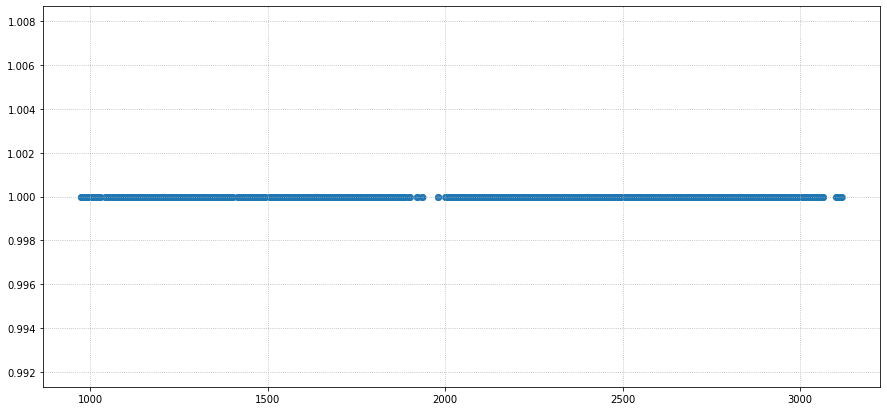

In [23]:
plt.figure(figsize=(15, 7))
plt.scatter(df['depth, m'][df['goal'] == 1], df['goal'][df['goal'] == 1], alpha=0.1)
plt.grid(ls=':')
plt.show()

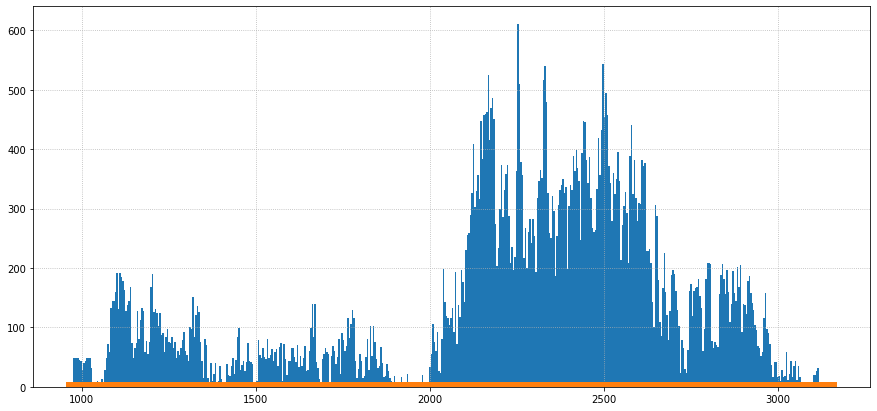

In [24]:
plt.figure(figsize=(15, 7))
plt.hist(df['depth, m'][df['goal'] == 1], bins=500)
plt.plot([min(df['depth, m']), max(df['depth, m'])], [0, 0], lw=10)
plt.grid(ls=':')
plt.show()

In [34]:
model = CatBoostClassifier(iterations=500,
                          learning_rate=0.01,
                          depth=10, custom_metric='F1', random_seed=19)
model.fit(X_train, y_train)

0:	learn: 0.6782804	total: 120ms	remaining: 59.9s
1:	learn: 0.6630814	total: 200ms	remaining: 49.8s
2:	learn: 0.6494635	total: 275ms	remaining: 45.6s
3:	learn: 0.6364501	total: 362ms	remaining: 44.9s
4:	learn: 0.6229049	total: 450ms	remaining: 44.6s
5:	learn: 0.6101026	total: 524ms	remaining: 43.2s
6:	learn: 0.5980584	total: 603ms	remaining: 42.5s
7:	learn: 0.5852754	total: 677ms	remaining: 41.6s
8:	learn: 0.5749169	total: 755ms	remaining: 41.2s
9:	learn: 0.5645758	total: 830ms	remaining: 40.7s
10:	learn: 0.5536397	total: 910ms	remaining: 40.4s
11:	learn: 0.5445802	total: 984ms	remaining: 40s
12:	learn: 0.5341551	total: 1.06s	remaining: 39.9s
13:	learn: 0.5251698	total: 1.15s	remaining: 40s
14:	learn: 0.5159733	total: 1.24s	remaining: 40s
15:	learn: 0.5070818	total: 1.32s	remaining: 40.1s
16:	learn: 0.4991148	total: 1.41s	remaining: 40.2s
17:	learn: 0.4910444	total: 1.49s	remaining: 39.9s
18:	learn: 0.4835344	total: 1.56s	remaining: 39.6s
19:	learn: 0.4752881	total: 1.64s	remaining: 39

162:	learn: 0.2382388	total: 12.5s	remaining: 25.8s
163:	learn: 0.2379655	total: 12.6s	remaining: 25.7s
164:	learn: 0.2377569	total: 12.6s	remaining: 25.6s
165:	learn: 0.2374834	total: 12.7s	remaining: 25.6s
166:	learn: 0.2373008	total: 12.8s	remaining: 25.5s
167:	learn: 0.2371183	total: 12.9s	remaining: 25.4s
168:	learn: 0.2368962	total: 12.9s	remaining: 25.4s
169:	learn: 0.2366737	total: 13s	remaining: 25.3s
170:	learn: 0.2364530	total: 13.1s	remaining: 25.2s
171:	learn: 0.2362375	total: 13.2s	remaining: 25.1s
172:	learn: 0.2360320	total: 13.2s	remaining: 25s
173:	learn: 0.2358116	total: 13.3s	remaining: 25s
174:	learn: 0.2356335	total: 13.4s	remaining: 24.9s
175:	learn: 0.2354458	total: 13.5s	remaining: 24.8s
176:	learn: 0.2352603	total: 13.6s	remaining: 24.8s
177:	learn: 0.2350502	total: 13.7s	remaining: 24.7s
178:	learn: 0.2347867	total: 13.8s	remaining: 24.7s
179:	learn: 0.2345796	total: 13.9s	remaining: 24.6s
180:	learn: 0.2343602	total: 13.9s	remaining: 24.6s
181:	learn: 0.2341

321:	learn: 0.2186201	total: 26.4s	remaining: 14.6s
322:	learn: 0.2185549	total: 26.5s	remaining: 14.5s
323:	learn: 0.2184962	total: 26.6s	remaining: 14.5s
324:	learn: 0.2184181	total: 26.7s	remaining: 14.4s
325:	learn: 0.2183529	total: 26.8s	remaining: 14.3s
326:	learn: 0.2182577	total: 26.9s	remaining: 14.2s
327:	learn: 0.2181979	total: 27s	remaining: 14.1s
328:	learn: 0.2181318	total: 27s	remaining: 14.1s
329:	learn: 0.2180455	total: 27.1s	remaining: 14s
330:	learn: 0.2179676	total: 27.2s	remaining: 13.9s
331:	learn: 0.2179139	total: 27.3s	remaining: 13.8s
332:	learn: 0.2178417	total: 27.4s	remaining: 13.7s
333:	learn: 0.2177768	total: 27.4s	remaining: 13.6s
334:	learn: 0.2176840	total: 27.5s	remaining: 13.5s
335:	learn: 0.2176057	total: 27.6s	remaining: 13.5s
336:	learn: 0.2175303	total: 27.7s	remaining: 13.4s
337:	learn: 0.2174676	total: 27.8s	remaining: 13.3s
338:	learn: 0.2174025	total: 27.8s	remaining: 13.2s
339:	learn: 0.2173247	total: 27.9s	remaining: 13.1s
340:	learn: 0.2172

482:	learn: 0.2096904	total: 40.6s	remaining: 1.43s
483:	learn: 0.2096627	total: 40.7s	remaining: 1.35s
484:	learn: 0.2095968	total: 40.8s	remaining: 1.26s
485:	learn: 0.2095642	total: 40.9s	remaining: 1.18s
486:	learn: 0.2095182	total: 41s	remaining: 1.09s
487:	learn: 0.2094759	total: 41.1s	remaining: 1.01s
488:	learn: 0.2094431	total: 41.2s	remaining: 927ms
489:	learn: 0.2093956	total: 41.3s	remaining: 843ms
490:	learn: 0.2093459	total: 41.4s	remaining: 759ms
491:	learn: 0.2093094	total: 41.5s	remaining: 675ms
492:	learn: 0.2092590	total: 41.6s	remaining: 590ms
493:	learn: 0.2092004	total: 41.7s	remaining: 506ms
494:	learn: 0.2091597	total: 41.8s	remaining: 422ms
495:	learn: 0.2091202	total: 41.9s	remaining: 338ms
496:	learn: 0.2090806	total: 42s	remaining: 253ms
497:	learn: 0.2090419	total: 42s	remaining: 169ms
498:	learn: 0.2089976	total: 42.2s	remaining: 84.5ms
499:	learn: 0.2089583	total: 42.2s	remaining: 0us


In [35]:
preds = model.predict(X_test)

In [36]:
probs = model.predict_proba(X_test)

In [37]:
accuracy_score(y_test, preds)

0.8918780442362461

In [38]:
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1])
optimal_idx = np.argmax(2 * precision * recall / (precision + recall))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.30224501355700123

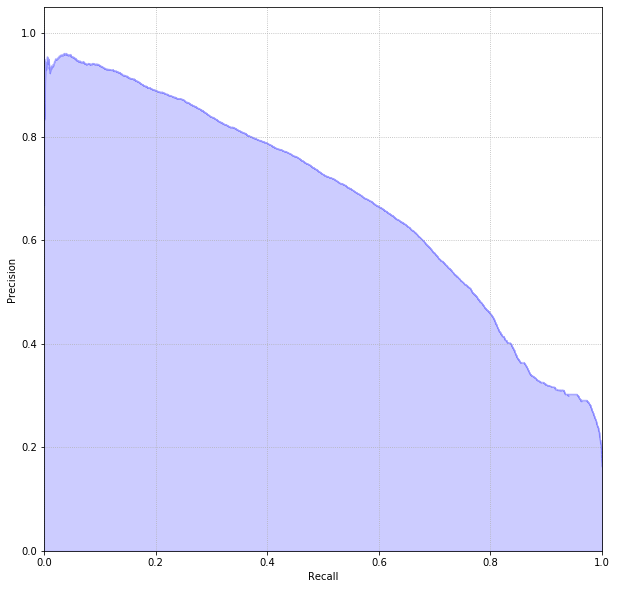

In [39]:
plt.figure(figsize=(10, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(ls=':')
plt.savefig('Precision-Recall curve.png')
plt.show()

In [40]:
preds = np.copy(probs[:,1])
preds[preds < optimal_threshold] = 0
preds[preds >= optimal_threshold] = 1

In [41]:
precision = precision_score(y_test, preds)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, preds)
print('F1 score: %f' % f1)

Precision: 0.624355
Recall: 0.655155
F1 score: 0.639385


In [42]:
print(model.get_feature_importance())
items = []
for item in cortages:
    if item not in to_delete:
        items.append(item)
items

[23.349456   20.99582854 18.59294304  7.66563987 29.39613255]


['bk', 'GZ1', 'NKTD', 'ALPS']